In [30]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [31]:
df = pd.read_csv(r"https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")

In [32]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)

rt.fit(X_train,y_train)

y_pred = rt.predict(X_test)

r2_score(y_test,y_pred)

0.7224163455290411

# Hyperparameter Tuning

In [34]:
param_grid = {
    'max_depth':[2,4,8,9,10,None],
    'criterion':['squared_error','friedman_mse','mae', 'absolute_error','poisson'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, cv=5)

reg.fit(X_train,y_train)

reg.best_score_

c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

0.7201826312636846

In [35]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_split': 0.25}

C:\Users\Jeevan\AppData\Local\Temp\ipykernel_28936\346575186.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


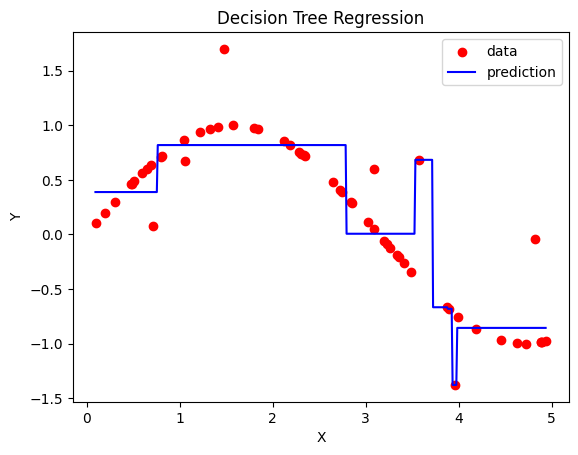

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Feature Importance

In [39]:
rt.feature_importances_, X_train.columns

(array([3.55038879e-02, 0.00000000e+00, 2.62746873e-03, 0.00000000e+00,
        4.73499974e-03, 6.45919336e-01, 7.02545917e-03, 7.18728865e-02,
        0.00000000e+00, 0.00000000e+00, 4.39109751e-03, 5.42729365e-04,
        2.27382135e-01]),
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'b', 'lstat'],
       dtype='object'))

In [38]:
rt.feature_importances_

array([3.55038879e-02, 0.00000000e+00, 2.62746873e-03, 0.00000000e+00,
       4.73499974e-03, 6.45919336e-01, 7.02545917e-03, 7.18728865e-02,
       0.00000000e+00, 0.00000000e+00, 4.39109751e-03, 5.42729365e-04,
       2.27382135e-01])

In [37]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

rm 0.6459193364379153
lstat 0.22738213470407953
dis 0.0718728865001841
crim 0.03550388785640969
age 0.007025459165410621
nox 0.004734999737276411
ptratio 0.00439109750712848
indus 0.0026274687266826724
b 0.0005427293649131115
zn 0.0
tax 0.0
rad 0.0
chas 0.0


Mean Squared Error: 0.6134593209334699
R2 Score:  0.5433165274628959


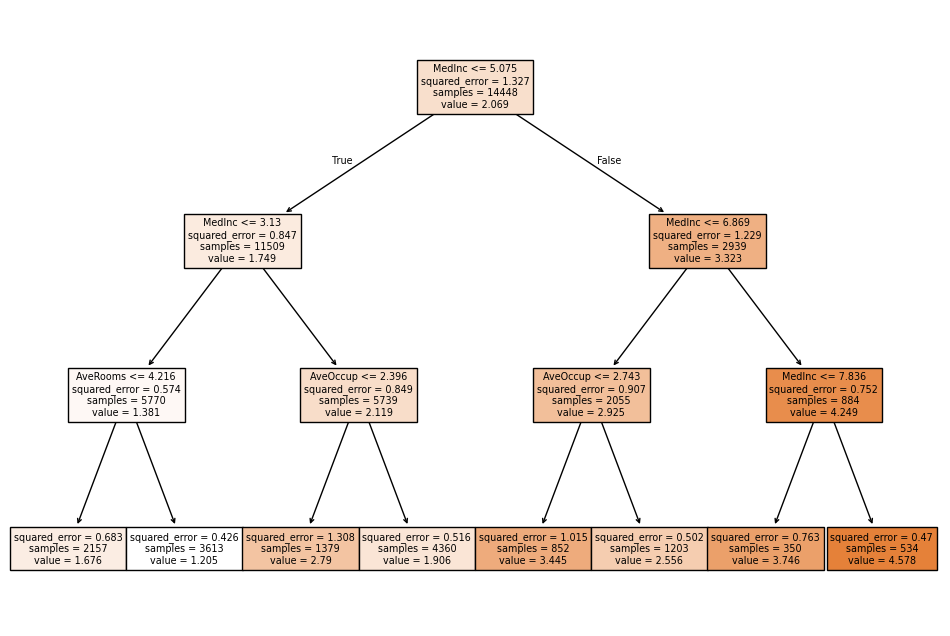

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features (e.g., median income, house age, etc.)
y = data.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Regression Tree model
tree = DecisionTreeRegressor(max_depth=3)  # Limit the depth to 3 for simplicity
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score: ", r2_score(y_test, y_pred))

# Visualize the Regression Tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=data.feature_names)
plt.show()